<a href="https://colab.research.google.com/github/Iamnir/Computational-Economics-/blob/main/Niranjan_Kumar_W3B_AnalyticsSelectedTopics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sorting | Pandas-Index | Joins | Groupby-Apply**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# charts
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

In [ ]:
base_path = "/content/drive/MyDrive/Classroom/"
data_export = pd.read_csv(base_path+"2018-2010_export.csv")
data_import = pd.read_csv(base_path+"2018-2010_import.csv")
print(data_export.shape, data_import.shape)

(137023, 5) (76124, 5)


In [ ]:
data_import.head(5)

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


Let's focus only on 2018

In [ ]:
data_export1= data_export[data_export.year==2018]
data_import1 = data_import[data_import.year==2018]

In [ ]:
exported = data_export1.groupby('Commodity').agg({'value':np.sum,'country':'nunique'})
imported = data_import1.groupby('Commodity').agg({'value':'sum','country':lambda ls: len(set(ls))}) 
#NOTE: Different ways of doing the same operations.. Let's Discuss
display(exported.shape, exported.head(), imported.shape, imported.head())

(98, 2)

,value,country
Commodity,,
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",1716.04,106
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.,251.71,165
ALUMINIUM AND ARTICLES THEREOF.,5703.10,198
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,1097.47,171
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.,110.94,88


(98, 2)

,value,country
Commodity,,
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",7615.41,73
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.,518.05,80
ALUMINIUM AND ARTICLES THEREOF.,5455.93,164
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,9994.44,74
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.,65.49,36


### Sorting

In [ ]:
top_exports1 = exported.sort_values('value', ascending=False)[:10]
top_imports1 = imported.sort_values('value', ascending=False)[:10]
display(top_exports1.tail(3), top_imports1.tail(3))

,value,country
Commodity,,
IRON AND STEEL,9741.67,185
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",8335.41,215
CEREALS.,8160.08,176


,value,country
Commodity,,
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,9994.44,74
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",9630.98,163
"INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES.",7624.43,114


In [ ]:
top_imports1.columns

Index(['value', 'country'], dtype='object')

In [ ]:
top_imports1.shape, top_imports1.reset_index().shape

((10, 2), (10, 3))

In [ ]:
top_imports1.reset_index()

,Commodity,value,country
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",64720.19,132
2,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197
3,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",43839.43,194
4,ORGANIC CHEMICALS,22389.41,128
5,PLASTIC AND ARTICLES THEREOF.,15246.55,173
6,IRON AND STEEL,12582.09,166
7,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74
8,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",9630.98,163
9,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114


In [ ]:
top_imports1.index # reset_index has not happened inplace

Index(['MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.',
       'NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.',
       'ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.',
       'NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.',
       'ORGANIC CHEMICALS', 'PLASTIC AND ARTICLES THEREOF.', 'IRON AND STEEL',
       'ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.',
       'OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;',
       'INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES.'],
      dtype='objec

In [ ]:
top_imports1.reset_index().index

RangeIndex(start=0, stop=10, step=1)

# Join by Index: *pd.concat*


<div class="alert alert-warning">

<b>CLASS CHALLENGE: </b>:

<ul>
  <li>What does the following code do?</li>
  <li>Can you write it in some other way - suited to wider applications?</li>
</ul>
 
</div>

In [ ]:
len(set(top_exports1.index) & set(top_imports1.index))

6

In [ ]:
pd.concat([top_exports1, top_imports1], join='inner', axis=1)

,value,country,value,country
Commodity,,,,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",47920.23,178,167871.78,134
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",40449.05,201,64720.19,132
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",20963.32,224,43839.43,194
ORGANIC CHEMICALS,18238.53,197,22389.41,128
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",12726.63,224,52048.26,197
IRON AND STEEL,9741.67,185,12582.09,166


In [ ]:
pd.concat([top_exports1, top_imports1], join='outer', axis=1, sort=True)

,value,country,value,country
Commodity,,,,
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,NaN,NaN,9994.44,74.0
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",8335.41,215.0,NaN,NaN
CEREALS.,8160.08,176.0,NaN,NaN
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",12726.63,224.0,52048.26,197.0
"INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES.",NaN,NaN,7624.43,114.0
IRON AND STEEL,9741.67,185.0,12582.09,166.0
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",47920.23,178.0,167871.78,134.0
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",40449.05,201.0,64720.19,132.0
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",20963.32,224.0,43839.43,194.0


## Do not do this.. warning!

In [ ]:
pd.concat([top_exports1.reset_index(), top_imports1.reset_index()], join='inner', axis=1)

,Commodity,value,country,Commodity,value,country
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",47920.23,178,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",40449.05,201,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",64720.19,132
2,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",20963.32,224,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197
3,ORGANIC CHEMICALS,18238.53,197,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",43839.43,194
4,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,18096.00,211,ORGANIC CHEMICALS,22389.41,128
5,PHARMACEUTICAL PRODUCTS,14753.39,215,PLASTIC AND ARTICLES THEREOF.,15246.55,173
6,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,12726.63,224,IRON AND STEEL,12582.09,166
7,IRON AND STEEL,9741.67,185,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74
8,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",8335.41,215,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",9630.98,163
9,CEREALS.,8160.08,176,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114


# Join by Key: *pd.merge*

In [ ]:
pd.merge(top_exports1.reset_index(), 
         top_imports1.reset_index(), 
         how='inner', on=['Commodity'],
         suffixes=('_exp', '_imp'))

,Commodity,value_exp,country_exp,value_imp,country_imp
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",47920.23,178,167871.78,134
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",40449.05,201,64720.19,132
2,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",20963.32,224,43839.43,194
3,ORGANIC CHEMICALS,18238.53,197,22389.41,128
4,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,12726.63,224,52048.26,197
5,IRON AND STEEL,9741.67,185,12582.09,166


In [ ]:
pd.merge(top_exports1.reset_index(), 
         top_imports1.reset_index(), 
         how='outer', on=['Commodity'],
         suffixes=('_exp', '_imp'))

,Commodity,value_exp,country_exp,value_imp,country_imp
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",47920.23,178.0,167871.78,134.0
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",40449.05,201.0,64720.19,132.0
2,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",20963.32,224.0,43839.43,194.0
3,ORGANIC CHEMICALS,18238.53,197.0,22389.41,128.0
4,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,18096.00,211.0,NaN,NaN
5,PHARMACEUTICAL PRODUCTS,14753.39,215.0,NaN,NaN
6,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,12726.63,224.0,52048.26,197.0
7,IRON AND STEEL,9741.67,185.0,12582.09,166.0
8,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",8335.41,215.0,NaN,NaN
9,CEREALS.,8160.08,176.0,NaN,NaN


In [ ]:
pd.merge(top_exports1.reset_index(), 
         top_imports1.reset_index(), 
         how='left', on=['Commodity'],
         suffixes=('_exp', '_imp'))

,Commodity,value_exp,country_exp,value_imp,country_imp
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",47920.23,178,167871.78,134.0
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",40449.05,201,64720.19,132.0
2,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",20963.32,224,43839.43,194.0
3,ORGANIC CHEMICALS,18238.53,197,22389.41,128.0
4,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,18096.00,211,NaN,NaN
5,PHARMACEUTICAL PRODUCTS,14753.39,215,NaN,NaN
6,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,12726.63,224,52048.26,197.0
7,IRON AND STEEL,9741.67,185,12582.09,166.0
8,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",8335.41,215,NaN,NaN
9,CEREALS.,8160.08,176,NaN,NaN


In [ ]:
pd.merge(top_exports1.reset_index(), 
         top_imports1.reset_index(), 
         how='right', on=['Commodity'],
         suffixes=('_exp', '_imp'))

,Commodity,value_exp,country_exp,value_imp,country_imp
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",47920.23,178.0,167871.78,134
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",40449.05,201.0,64720.19,132
2,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,12726.63,224.0,52048.26,197
3,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",20963.32,224.0,43839.43,194
4,ORGANIC CHEMICALS,18238.53,197.0,22389.41,128
5,PLASTIC AND ARTICLES THEREOF.,NaN,NaN,15246.55,173
6,IRON AND STEEL,9741.67,185.0,12582.09,166
7,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,NaN,NaN,9994.44,74
8,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",NaN,NaN,9630.98,163
9,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,NaN,NaN,7624.43,114






<div class="alert alert-warning">

<b>CLASS CHALLENGE: </b>:

<ul>
  <li> How many commodities occur in total in both of top_exports, top_imports?</li>
    <li> Plot the deficit/surpluses of these commodities</li>
</ul>
 
</div>

In [ ]:
commons = pd.merge(top_exports1.reset_index(), 
         top_imports1.reset_index(), 
         how='inner', on=['Commodity'],
         suffixes=('_exp', '_imp'))

commons['surplus'] = commons['value_exp'] - commons['value_imp']
commons

,Commodity,value_exp,country_exp,value_imp,country_imp,surplus
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",47920.23,178,167871.78,134,-119951.55
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",40449.05,201,64720.19,132,-24271.14
2,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",20963.32,224,43839.43,194,-22876.11
3,ORGANIC CHEMICALS,18238.53,197,22389.41,128,-4150.88
4,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,12726.63,224,52048.26,197,-39321.63
5,IRON AND STEEL,9741.67,185,12582.09,166,-2840.42


<div class="alert alert-success">

<b>EXERCISE 1 (20 points)</b>:

<ul>
  <li>Is top 10 the best way to define "top exports" or top imports"? Can you suggest something better - explain with plots, code etc.?</li>
</ul>
 
    
</div>



# Solution for Exercise1

Earlier top_imports and top_exports were defined for only year 2018. We can use quantiles to get the top_exports and top_imports for all years. 

Step-1. Clean the original dataset

In [ ]:
#define a function to clean data 
def cleandata(df):
    #setting country UNSPECIFIED to nan
    df['country']= df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    #drop where value is 0 . 
    df = df[df.value!=0]
    df.dropna(inplace=True)
    df.year = pd.Categorical(df.year)
    df.drop_duplicates(keep="first",inplace=True)
    return df

In [ ]:
#Clean data using the function created above 
data_import = cleandata(data_import)
data_export = cleandata(data_export)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Step2. Create new dataframes using commodity as groups or indices and add the values to particular index(commodity). 

In [ ]:
#New dataframes grouped by commodity 
exported = data_export.groupby('Commodity').agg({'value':'sum', 'country':'nunique'})
imported = data_import.groupby('Commodity').agg({'value':'sum', 'country':'nunique'})
#Check the shape
display(exported.shape, exported.head(), imported.shape, imported.head())


(98, 2)

,value,country
Commodity,,
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",27687.95,126
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.,2383.74,157
ALUMINIUM AND ARTICLES THEREOF.,25402.17,191
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,8771.44,157
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.,656.06,85


(98, 2)

,value,country
Commodity,,
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",49845.10,100
ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GLUES; ENZYMES.,3125.84,84
ALUMINIUM AND ARTICLES THEREOF.,32081.86,184
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,90880.98,91
ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF.,310.29,40


Step-3. Create a threshold function to define top criteria using quantiles. 

In [ ]:
#Create a new function to define the top 
def threshold(df):
    q1 = df.value.quantile(.25)
    q3 = df.value.quantile(.75)
    #Using quantiles create a limit criteria 
    Max_limit = q3+ 1.75*(q3-q1)/2
    top_com= df[df.value>Max_limit]
    #sort the data using 'value'
    top_com= top_com.sort_values('value', ascending=False)
    return top_com
  
top_exports=threshold(exported)
top_imports=threshold(imported)


In [ ]:
#Extra: Cross-check the duplicate, remove hash below to run the code 
#top_exports.duplicated(), top_imports.duplicated()
top_exports.shape, top_imports.shape

((16, 2), (15, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



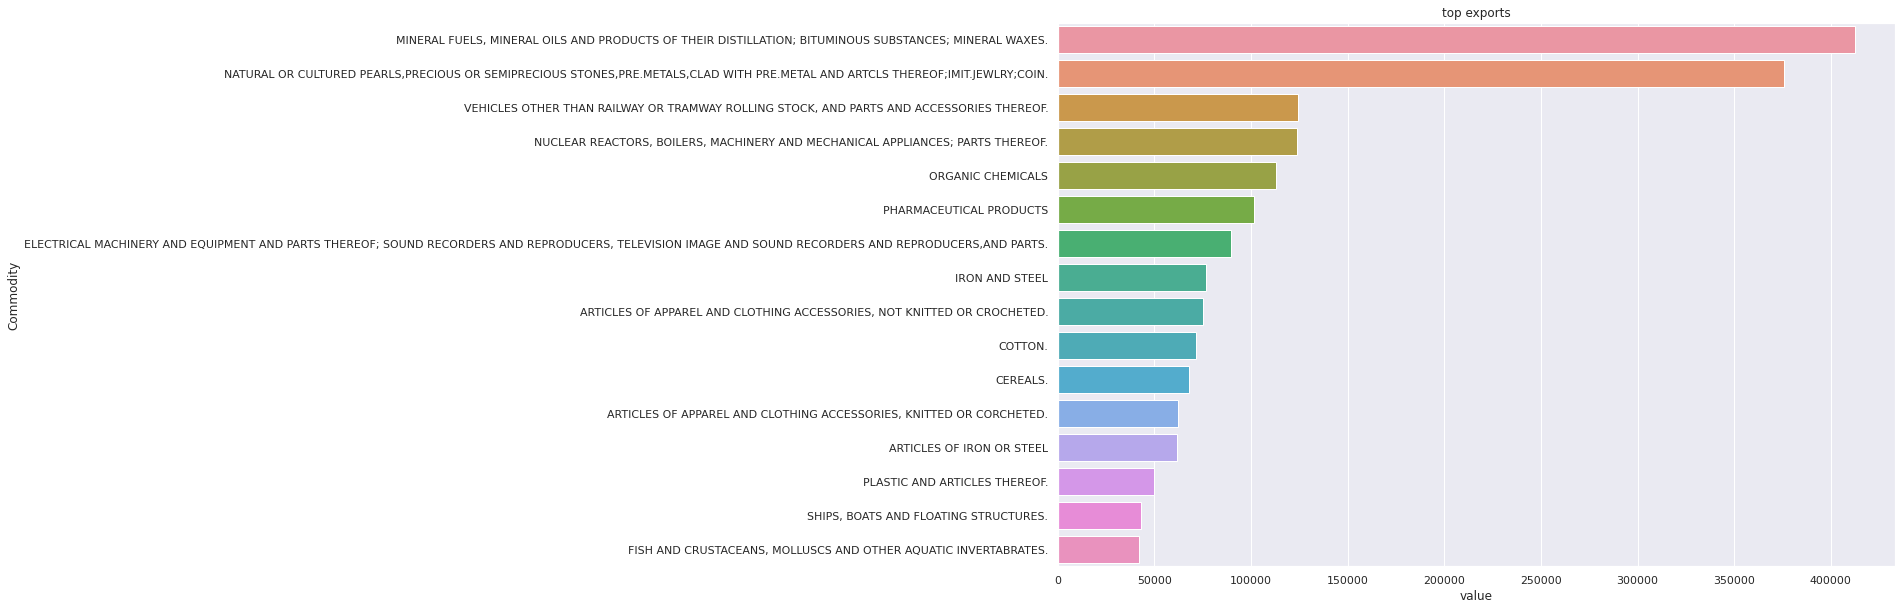

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



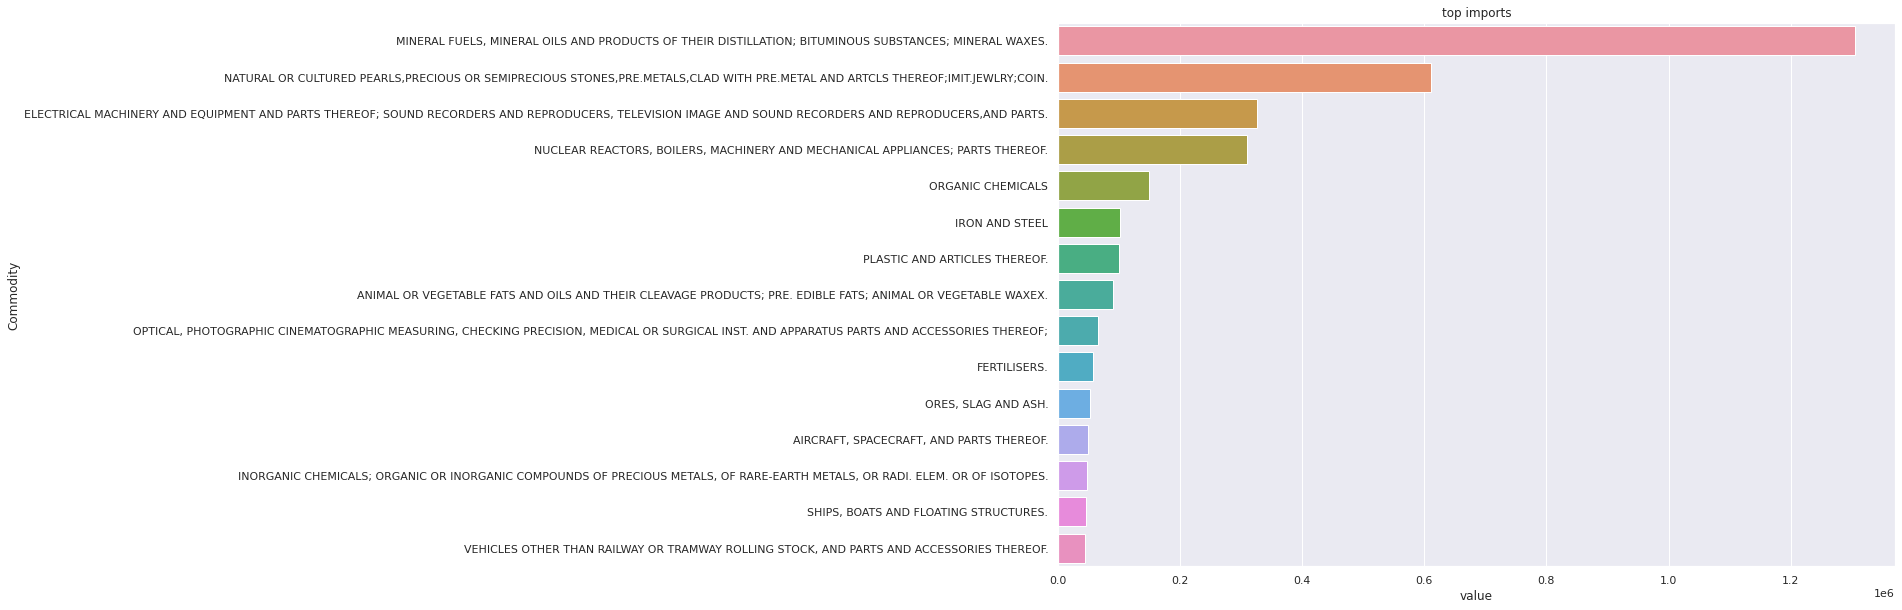

In [ ]:
#Now plot the bar graph using 
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(top_exports.value, top_exports.index).set_title('top exports')
plt.show()
sns.barplot(top_imports.value, top_imports.index).set_title('top imports')
plt.show()


<div class="alert alert-success">

<b>EXERCISE 2 (20 Points)</b>:

<ul>
  <li>Plot the deficits/surpluses for top_exported/imported commodities as per your definition. </li>
</ul>
 
    
</div>

Step-1. First find the deficit/surplus for top_imports 
In the previous exercise, we have got 15 commodities in top_imports and 16 commodities in top_exports. 

# Solution for Exercise 2

In [ ]:
top_imports_deficits = pd.merge(top_imports.reset_index(), 
         exported.reset_index(), 
         how='left', on=['Commodity'],
         suffixes = ('_imp','_exp')
        )
top_imports_deficits['deficit'] = top_imports_deficits.value_exp - top_imports_deficits.value_imp
top_imports_deficits

,Commodity,value_imp,country_imp,value_exp,country_exp,deficit
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1305259.28,158,412501.31,205,-892757.97
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",611404.45,153,375706.03,209,-235698.42
2,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,326602.08,208,89591.47,229,-237010.61
3,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",310410.14,214,123727.12,224,-186683.02
4,ORGANIC CHEMICALS,150059.05,155,112712.70,209,-37346.35
5,IRON AND STEEL,102121.07,194,76473.01,196,-25648.06
6,PLASTIC AND ARTICLES THEREOF.,99483.22,191,49838.58,213,-49644.64
7,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,90880.98,91,8771.44,157,-82109.54
8,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",65458.47,187,21275.67,217,-44182.80
9,FERTILISERS.,57157.93,81,820.59,116,-56337.34


Step-2. Find the deficit/surplus for top_exports 

In [ ]:
top_exports_deficits = pd.merge(top_exports.reset_index(), 
         imported.reset_index(), 
         how='left', on=['Commodity'],
         suffixes = ('_exp','_imp')
        )
top_exports_deficits['deficit'] = top_exports_deficits.value_exp- top_exports_deficits.value_imp
top_exports_deficits

,Commodity,value_exp,country_exp,value_imp,country_imp,deficit
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",412501.31,205,1305259.28,158,-892757.97
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",375706.03,209,611404.45,153,-235698.42
2,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,124465.27,217,45285.19,130,79180.08
3,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",123727.12,224,310410.14,214,-186683.02
4,ORGANIC CHEMICALS,112712.70,209,150059.05,155,-37346.35
5,PHARMACEUTICAL PRODUCTS,101504.03,218,15101.36,110,86402.67
6,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,89591.47,229,326602.08,208,-237010.61
7,IRON AND STEEL,76473.01,196,102121.07,194,-25648.06
8,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",75105.04,221,2807.51,97,72297.53
9,COTTON.,71253.28,200,6912.65,106,64340.63


Step-3. Plot the deficit graph for top_imports
Note: In deficit column, positive value represents surplus since deficit formulae was used above. 

In [ ]:

# create subplot1
import plotly.graph_objs as go

Subplot1 = go.Bar(
                x = top_imports_deficits.Commodity,
                y = top_imports_deficits.value_imp,
                name = "Import for top_imports",
                marker = dict(color = 'rgba(0,191,200, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = top_imports_deficits.value_imp)
# create subplot2
Subplot2 = go.Bar(
                x = top_imports_deficits.Commodity,
                y = top_imports_deficits.value_exp,
                name = "Export for top_imports",
                marker = dict(color = 'rgba(1, 255, 110, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = top_imports_deficits.value_exp)
#create subplot3
Subplot3 = go.Bar(
                x = top_imports_deficits.Commodity,
                y = top_imports_deficits.deficit,
                name = "Trade Deficit/Surplus",
                marker = dict(color = 'rgba(210, 20, 160, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = top_imports_deficits.deficit)

#combine all subplots on one graph 
data = [Subplot1, Subplot2, Subplot3]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.update_layout(
    title=go.layout.Title(
        text="Commodity wise top_Import/top_Export/Trade deficit or Surplus for top_imported data",
        xref="paper",
        x=0
      ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color='#17becf'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color='#17becf'
            )
        )
    )
)
#update the size of the graph 
fig.update_layout(
    autosize=False,
    width=2000,
    height=1500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()

Step-4. Plot the deficit/surplus graph for top_exports
Note: Positive value represents surplus and negative represents deficit here since I have used deficit formulae above. 

In [ ]:

# create subplot1
import plotly.graph_objs as go

Subplot1 = go.Bar(
                x = top_exports_deficits.Commodity,
                y = top_exports_deficits.value_exp,
                name = "Export for top_imports",
                marker = dict(color = 'rgba(10,101,100, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = top_exports_deficits.value_exp)
# create subplot2
Subplot2 = go.Bar(
                x = top_exports_deficits.Commodity,
                y = top_exports_deficits.value_imp,
                name = "Export for top_imports",
                marker = dict(color = 'rgba(1, 20, 200, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = top_exports_deficits.value_imp)
#create subplot3
Subplot3 = go.Bar(
                x = top_exports_deficits.Commodity,
                y = top_exports_deficits.deficit,
                name = "Trade Deficit/Surplus",
                marker = dict(color = 'rgba(10, 200, 200, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = top_exports_deficits.deficit)

#combine all subplots on one graph 
data = [Subplot1, Subplot2, Subplot3]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.update_layout(
    title=go.layout.Title(
        text="Commodity wise top_Import/top_Export/Trade deficit or Surplus for top_exported data",
        xref="paper",
        x=0
      ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color='#17becf'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(
                family="Georgia, monospace",
                size=18,
                color='#17becf'
            )
        )
    )
)
#update the size of the graph 
fig.update_layout(
    autosize=False,
    width=2000,
    height=1500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()

<div class="alert alert-warning">

<b>CLASS CHALLENGE 3: </b>:

<ul>
  <li> Create a dataframe to lookup what dollar value was imported for each country-commodity pair</li>
</ul>
 
</div>

In [ ]:
data_import_grouped = data_import.groupby(['country','Commodity'])
type(data_import_grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
cci_lookup = data_import_grouped.agg({'value':'sum'}).reset_index()
cci_lookup.head()

,country,Commodity,value
0,AFGHANISTAN TIS,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",0.12
1,AFGHANISTAN TIS,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,0.03
2,AFGHANISTAN TIS,ALUMINIUM AND ARTICLES THEREOF.,0.02
3,AFGHANISTAN TIS,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,1.03
4,AFGHANISTAN TIS,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",0.01


# Group-By Apply

<div class="alert alert-warning">

<b>CLASS CHALLENGE 4: </b>:

<ul>
  <li> For the top 10 imported commodities, find the top 3 countries they are imported from</li>
</ul>
 
</div>

In [ ]:
top_imports1.reset_index().rename(columns={'country':'n_ctries'})

,Commodity,value,n_ctries
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",64720.19,132
2,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197
3,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",43839.43,194
4,ORGANIC CHEMICALS,22389.41,128
5,PLASTIC AND ARTICLES THEREOF.,15246.55,173
6,IRON AND STEEL,12582.09,166
7,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74
8,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",9630.98,163
9,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114


In [ ]:
top_imports1.country.sum()

1475

In [ ]:
cci_lookup.rename(columns={'value':'country_value'})

,country,Commodity,country_value
0,AFGHANISTAN TIS,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",0.12
1,AFGHANISTAN TIS,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,0.03
2,AFGHANISTAN TIS,ALUMINIUM AND ARTICLES THEREOF.,0.02
3,AFGHANISTAN TIS,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,1.03
4,AFGHANISTAN TIS,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",0.01
...,...,...,...
9702,ZIMBABWE,TANNING OR DYEING EXTRACTS; TANNINS AND THEIR ...,14.24
9703,ZIMBABWE,TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.,59.06
9704,ZIMBABWE,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.01
9705,ZIMBABWE,WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,0.15


In [ ]:
top_imports1_wcs = pd.merge(top_imports1.reset_index().rename(columns={'country':'n_ctries'}), 
                            cci_lookup.rename(columns={'value':'country_value'}), 
                            how='left', on=['Commodity'])
display(top_imports1_wcs.shape)
top_imports1_wcs.head()

(1693, 5)

,Commodity,value,n_ctries,country,country_value
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ALBANIA,413.96
1,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ALGERIA,9524.88
2,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ANDORRA,5.27
3,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ANGOLA,41640.18
4,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ANTIGUA,0.04


In [ ]:
top_imports1_wcs.sort_values(['Commodity','country_value'], ascending=[True, False]).head()

,Commodity,value,n_ctries,country,country_value
1306,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,INDONESIA,40097.92
1321,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,MALAYSIA,17006.63
1274,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,ARGENTINA,13936.86
1360,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,UKRAINE,11967.92
1281,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,BRAZIL,3040.96


In [ ]:
top_imports1_w3cs = top_imports1_wcs.sort_values(['Commodity','country_value'], 
                                                ascending=[True,False]).groupby('Commodity').head(3)
top_imports1_w3cs

,Commodity,value,n_ctries,country,country_value
1306,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,INDONESIA,40097.92
1321,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,MALAYSIA,17006.63
1274,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,ARGENTINA,13936.86
350,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197,CHINA P RP,162033.10
408,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197,KOREA RP,20836.92
393,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197,HONG KONG,15010.28
1575,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114,CHINA P RP,6295.28
1632,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114,MOROCCO,6097.57
1682,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114,U S A,3612.00
1171,IRON AND STEEL,12582.09,166,KOREA RP,16428.12


In [ ]:
def get_topk_by(df, by, k=3, greater_is_top=True):
    return df.sort_values(by, ascending = not greater_is_top).head(k)

In [ ]:
from functools import partial
get_top3_by_ctryval = partial(get_topk_by, by='country_value', k=3)
get_top5_by_ctryval = partial(get_topk_by, by='country_value', k=5)

In [ ]:
def get_top3_by_ctryval_simple(df):
    desired_df = df.sort_values('country_value', ascending=False)[:3]
    return desired_df

In [ ]:
top_imports1_wcs.head()

,Commodity,value,n_ctries,country,country_value
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ALBANIA,413.96
1,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ALGERIA,9524.88
2,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ANDORRA,5.27
3,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ANGOLA,41640.18
4,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134,ANTIGUA,0.04


In [ ]:
top_imports1_wcs.groupby('Commodity').apply(get_top3_by_ctryval_simple)

Commodity  ...  country_value
Commodity                                                                                                   ...               
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE... 1306  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       40097.92
                                                   1321  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       17006.63
                                                   1274  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       13936.86
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH... 350   ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...  ...      162033.10
                                                   408   ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...  ...       20836.92
                                                   393   ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...  ...       15010.28
INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPO... 1575  INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...  ...        6295.28
                                                   1632  INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...  ...        6097.57
                                                   1682  INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...  ...        3612.00
IRON AND STEEL                                     1171                                     IRON AND STEEL  ...       16428.12
                                                   1114                                     IRON AND STEEL  ...       15776.12
                                                   1165                                     IRON AND STEEL  ...       11559.61
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE... 118   MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  ...      205211.39
                                                   60    MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  ...      141811.93
                                                   146   MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  ...      106365.79
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC... 290   NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...  ...      188481.71
                                                   297   NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...  ...      114016.96
                                                   170   NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...  ...       64204.88
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN... 560   NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...  ...       96049.07
                                                   592   NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...  ...       35981.38
                                                   719   NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...  ...       29309.43
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING... 1538  OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...  ...       12825.77
                                                   1399  OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...  ...       10724.41
                                                   1424  OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...  ...        9268.29
ORGANIC CHEMICALS                                  760                                   ORGANIC CHEMICALS  ...       52280.81
                                                   857                                   ORGANIC CHEMICALS  ...       11708.41
                                                   853                                   ORGANIC CHEMICALS  ...       11576.85
PLASTIC AND ARTICLES THEREOF.                      923                       PLASTIC AND ARTICLES THEREOF.  ...       14706.18
                                                   978                       PLASTIC AND ARTICLES THEREOF.  ...       11348.80
                                                   1065                      PLASTIC AND ARTICLES THEREOF.  ...        8242.54

[30 rows x 5 columns]

In [ ]:
top_imports1_w3cs = top_imports1_wcs.groupby('Commodity').apply(get_top3_by_ctryval)
top_imports1_w3cs.head()

Commodity  ...  country_value
Commodity                                                                                                   ...               
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE... 1306  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       40097.92
                                                   1321  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       17006.63
                                                   1274  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       13936.86
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH... 350   ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...  ...      162033.10
                                                   408   ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...  ...       20836.92

[5 rows x 5 columns]

In [ ]:
top_imports1_w3cs = top_imports1_wcs.groupby('Commodity').apply(get_top5_by_ctryval)
top_imports1_w3cs.head()

Commodity  ...  country_value
Commodity                                                                                                   ...               
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLE... 1306  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       40097.92
                                                   1321  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       17006.63
                                                   1274  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       13936.86
                                                   1360  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...       11967.92
                                                   1281  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  ...        3040.96

[5 rows x 5 columns]

<div class="alert alert-success">

<b>EXERCISE 3: </b>:

<ul>
  <li> For the country commodity pairs in top_imports_w3cs, find out the fiscal deficits for the year 2018 (20 Points)</li>
  <li> Show these on an interactive scatter plot with import values on x axis, export values on y axis, where hovering should show up the country, commodity and deficit. Hint: Use plotly or one of the interactive visualization libraries in the colab tutorials given in first week's readings (40 Points)</li>
</ul>

</div>

# Solution for Exercise 3

Step-1. Part-1 Calculation 

In [ ]:
#Resetting the index of the w3cs dataframe and obtain new dataframe 
top_imports1_w3cs_new = top_imports1_w3cs.reset_index(drop=True)

top_imports1_w3cs_new=top_imports1_w3cs_new[["Commodity","country","country_value"]]

data_export_new=data_export1[["Commodity","country","value"]]
data_export_new.rename(columns = {'value':'country_value'}, inplace = True)

#Find the trade deficits
trade_deficit_new = pd.merge(top_imports1_w3cs_new, data_export_new, how='left', 
                        on=['Commodity', 'country'], suffixes = ('_imp','_exp'))

trade_deficit_new['trade_deficit'] = trade_deficit_new.country_value_imp - trade_deficit_new.country_value_exp
trade_deficit_new

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Commodity,country,country_value_imp,country_value_exp,trade_deficit
0,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,INDONESIA,40097.92,2.57,40095.35
1,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,MALAYSIA,17006.63,13.05,16993.58
2,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,ARGENTINA,13936.86,0.99,13935.87
3,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,UKRAINE,11967.92,0.92,11967.00
4,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,BRAZIL,3040.96,6.73,3034.23
5,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,CHINA P RP,162033.10,579.52,161453.58
6,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,KOREA RP,20836.92,169.62,20667.30
7,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,HONG KONG,15010.28,284.36,14725.92
8,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,U S A,13738.46,1786.79,11951.67
9,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,GERMANY,13563.18,624.60,12938.58


Step-2. For part-2 to plot the scatter plot. 

In [ ]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models.tools import HoverTool
from bokeh.models import ColumnDataSource
output_notebook()

fig= figure()
data = ColumnDataSource(trade_deficit_new)

#Create circle layer
fig.circle(x='country_value_imp', y='country_value_exp', source=data, size=5, color='blue')

#Create hover layer
hover = HoverTool()
hover.tooltips=[('Country', '@country'),('Commodity', '@Commodity'),('Trade Deficit', '@trade_deficit')]

#Merge two layers to get full graph
fig.add_tools(hover)
fig.title.text = 'Trade Deficits in year 2018 for top imports, for Top 3 Import Countries'
fig.xaxis.axis_label = 'Imports'
fig.yaxis.axis_label = 'Exports'
show(fig)